In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [14]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.
        self.N = 0. 

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


In [15]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([bandit.p for bandit in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
    
    
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal j: 2
mean estimate: 0.18000000000000008
mean estimate: 0.5797101449275365
mean estimate: 0.741671217913709
total reward earned: 1416.0
overall win rate: 0.708
num_times_explored: 213
num_times_exploited: 1787
num times selected optimal bandit: 1831


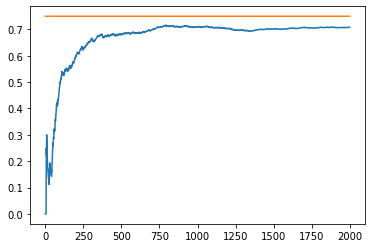

In [16]:
experiment()